In [1]:
from functools import reduce
import operator
from itertools import combinations
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
model = gensim.models.Word2Vec.load("../out/models/preorder/embs-i10-w20-l10000-v200-j.gensim")

In [3]:
# Tip of the hat to http://devmount.github.io/GermanWordEmbeddings/

def draw_words(model, words, draw_words=None, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):        
    if draw_words is None:
        draw_words = words
    
    # get vectors for given words from model
    vectors = [model[word] for word in words]
    draw_vectors = [model[word] for word in draw_words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(draw_vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(draw_vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d, draw_words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in range(0, len(draw_words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


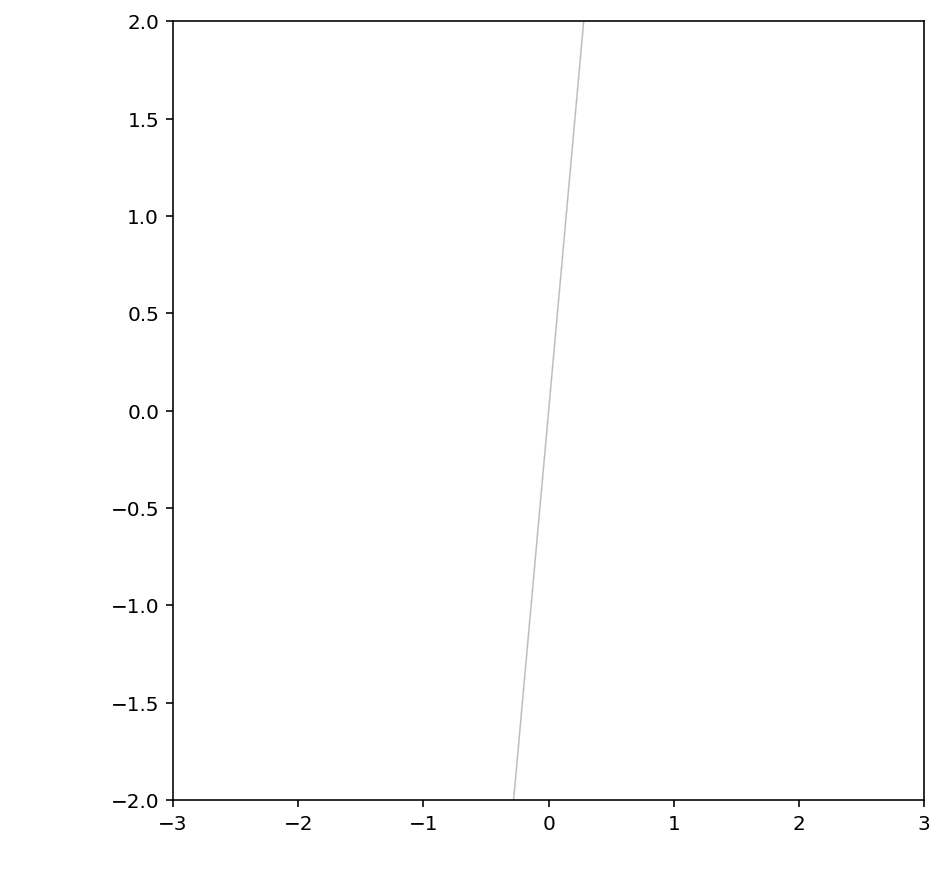

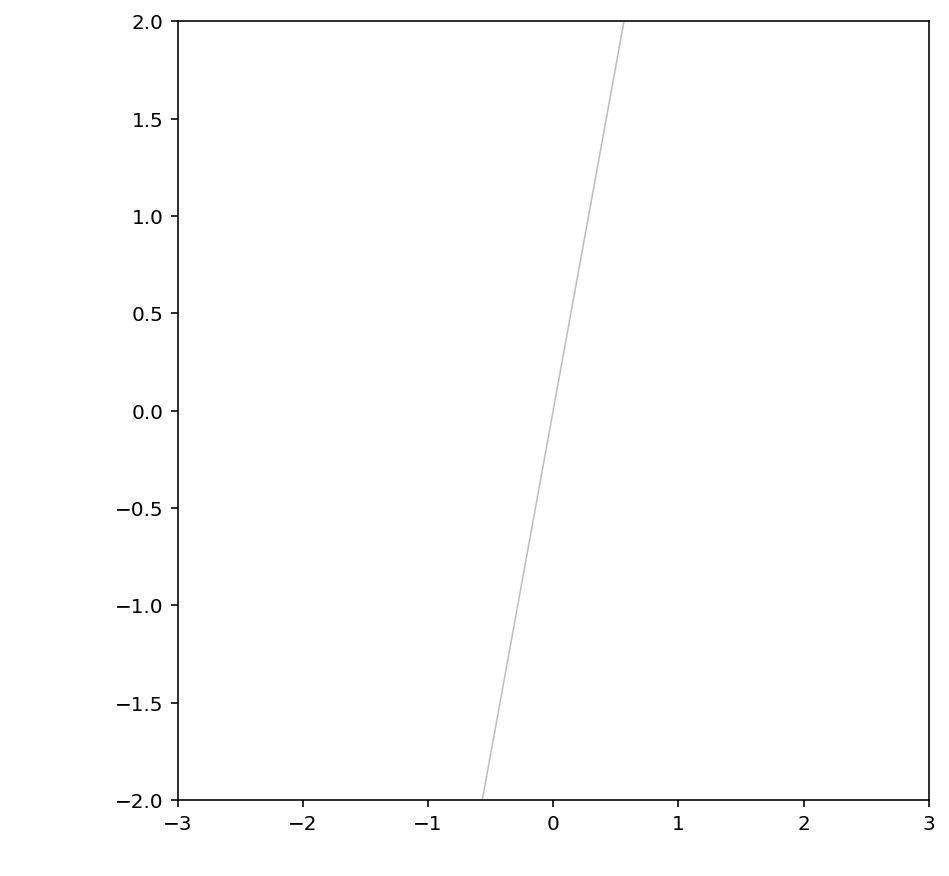

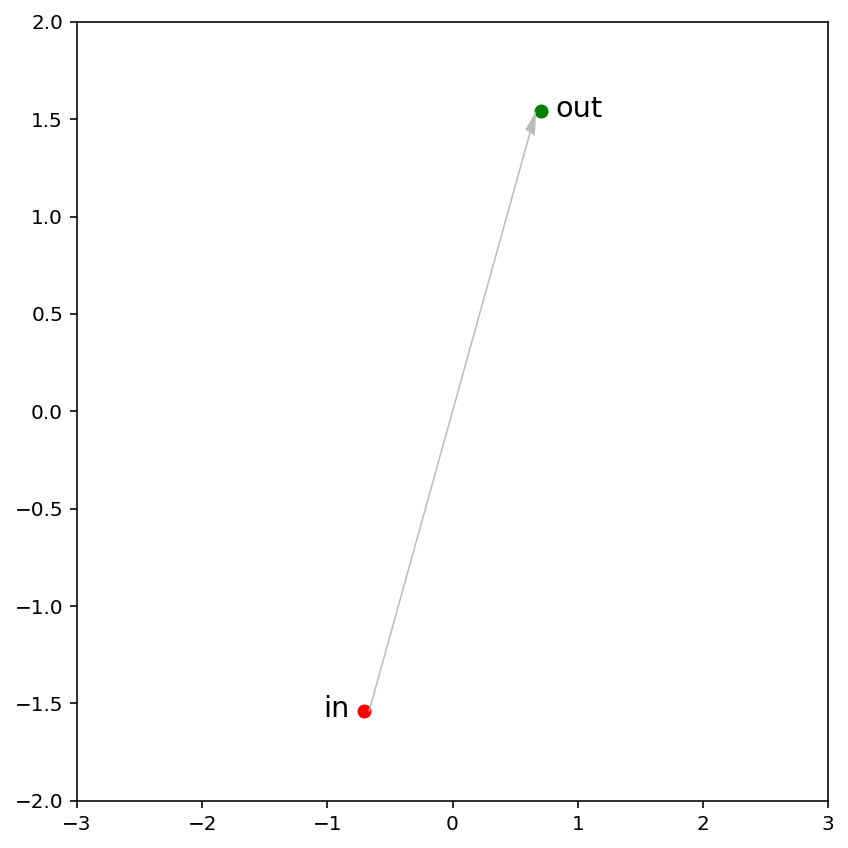

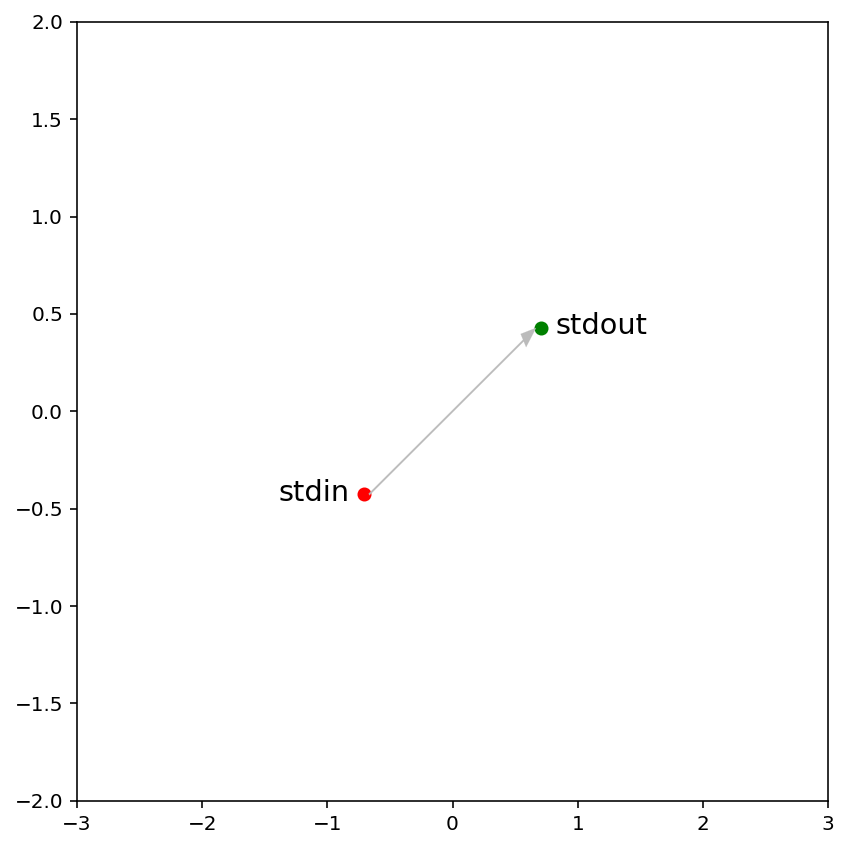

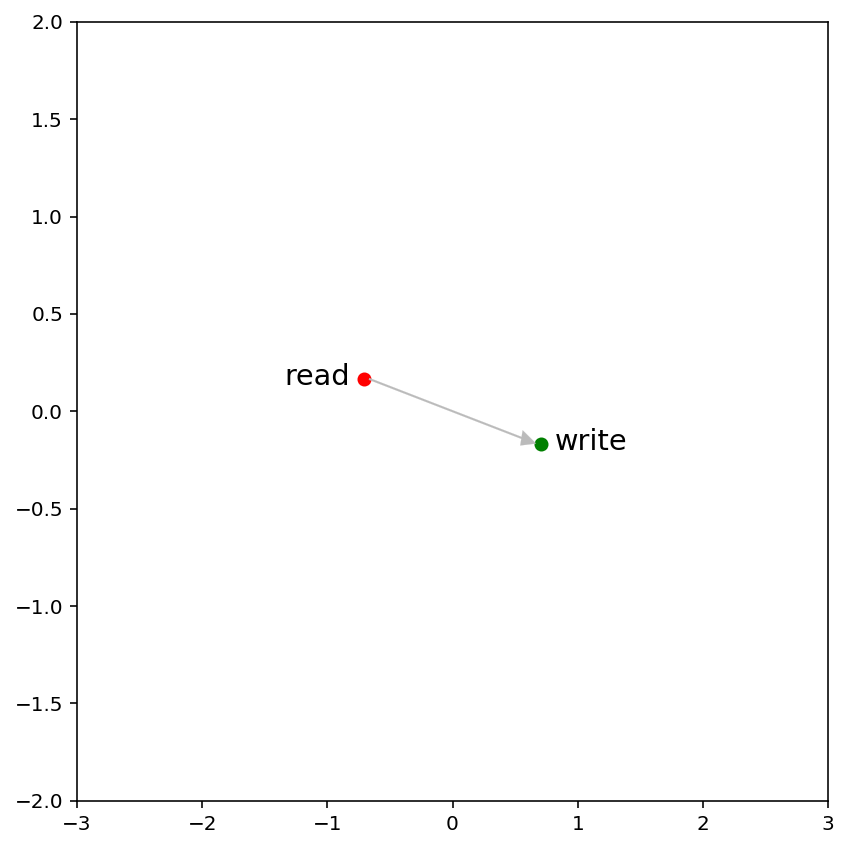

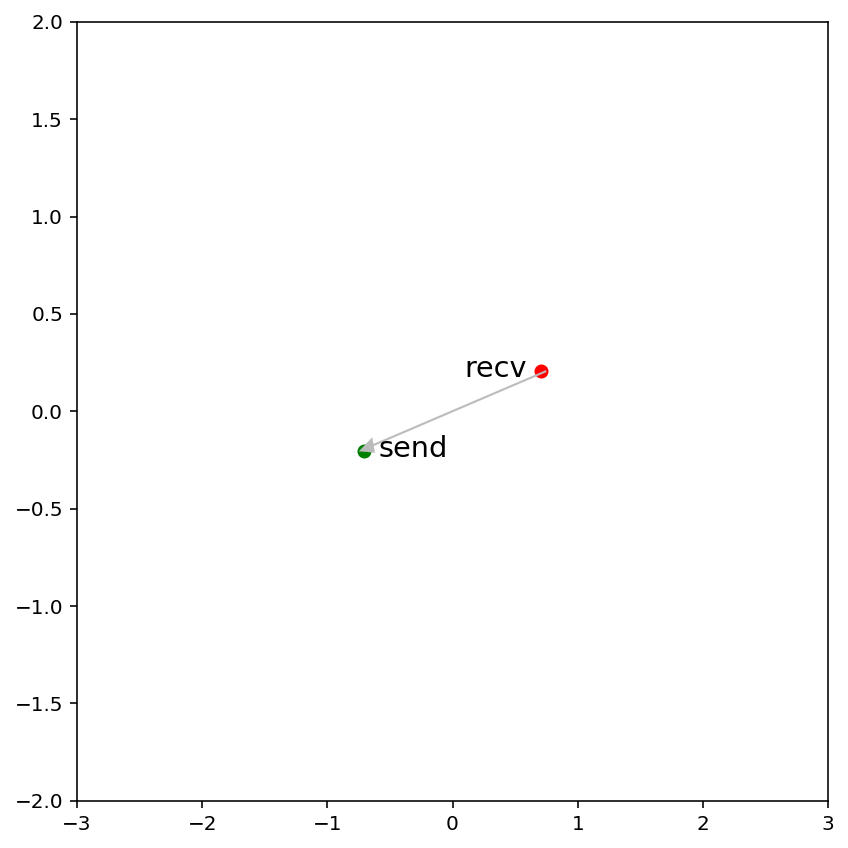

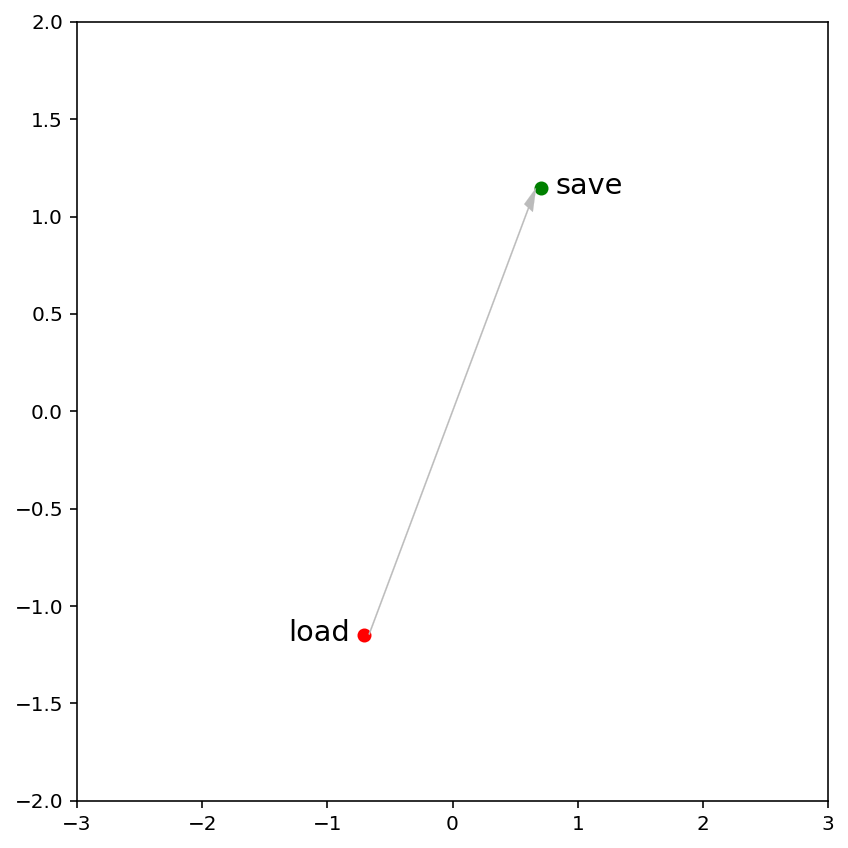

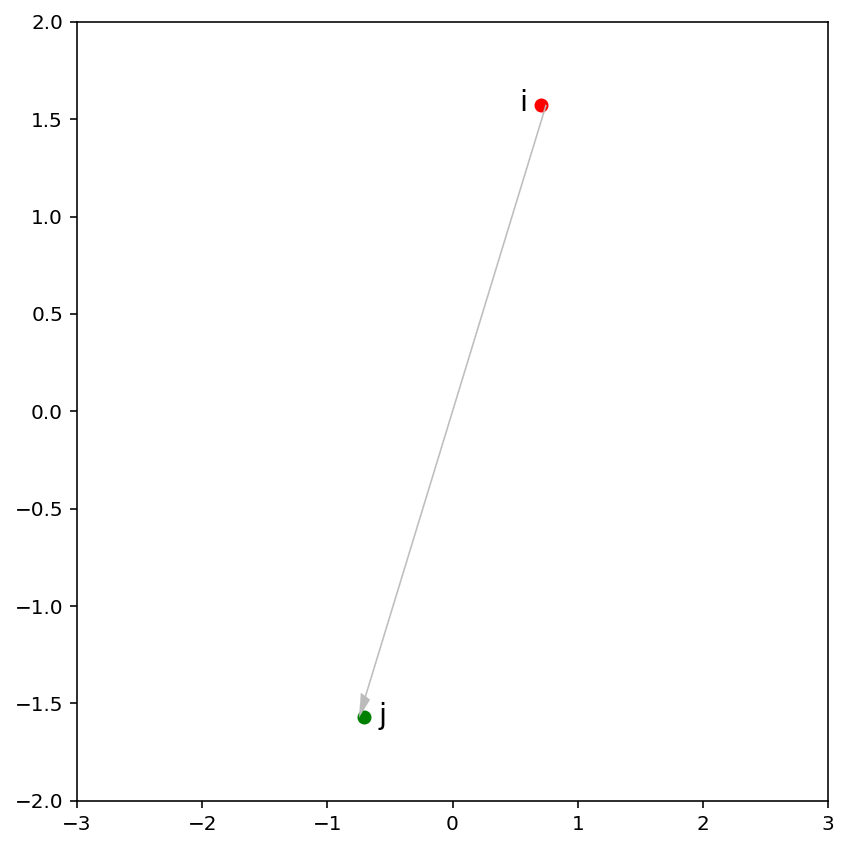

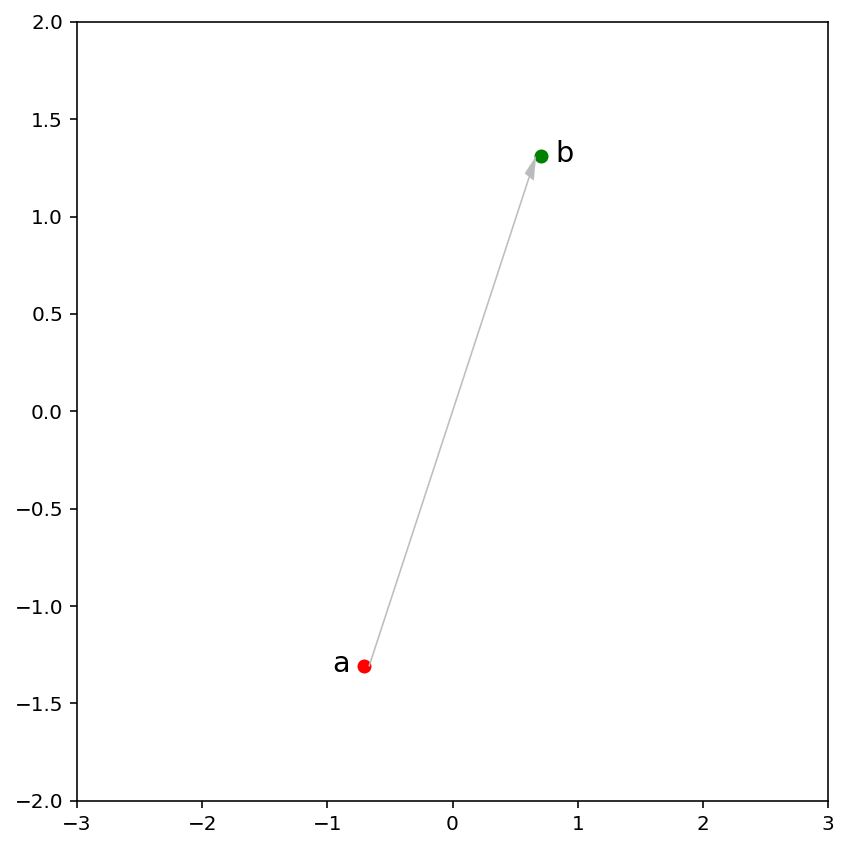

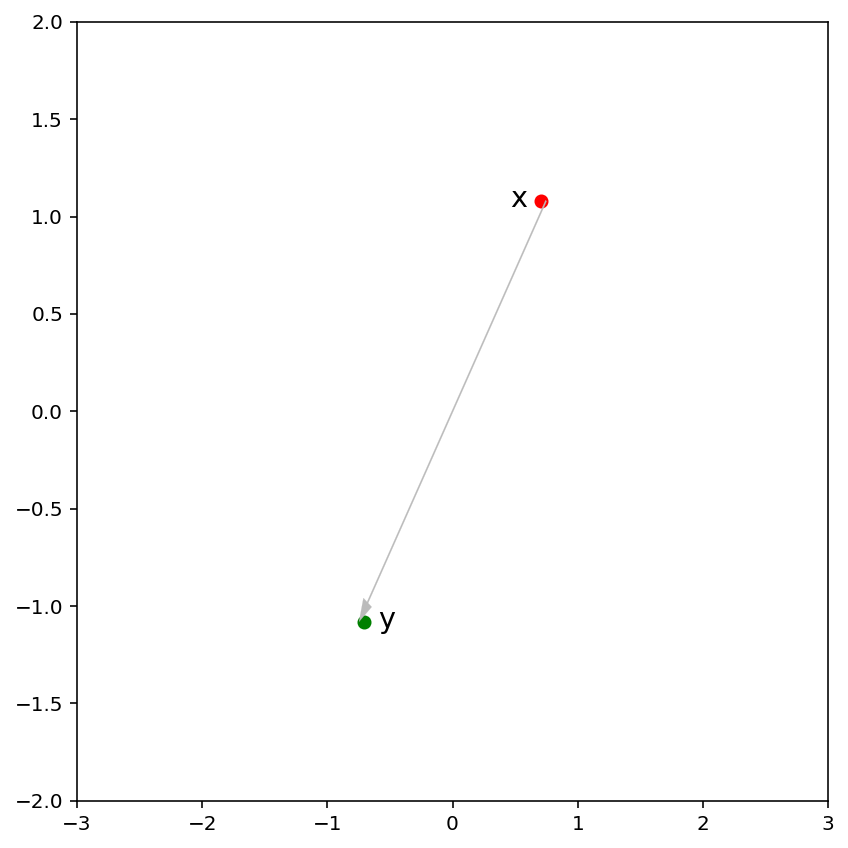

In [4]:
pairs = [('alloc', 'free'), ('open', 'close'),
         ('in', 'out'), ('stdin', 'stdout'), ('read', 'write'), ('recv', 'send'), ('load', 'save'),
         ('i', 'j'), ('a', 'b'), ('x', 'y')]

for combo in combinations(pairs, 1):
    words = list(reduce(operator.add, combo))
    draw_words(model, words, pca=True, alternate=True, arrows=True, x1=-3, x2=3, y1=-2, y2=2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


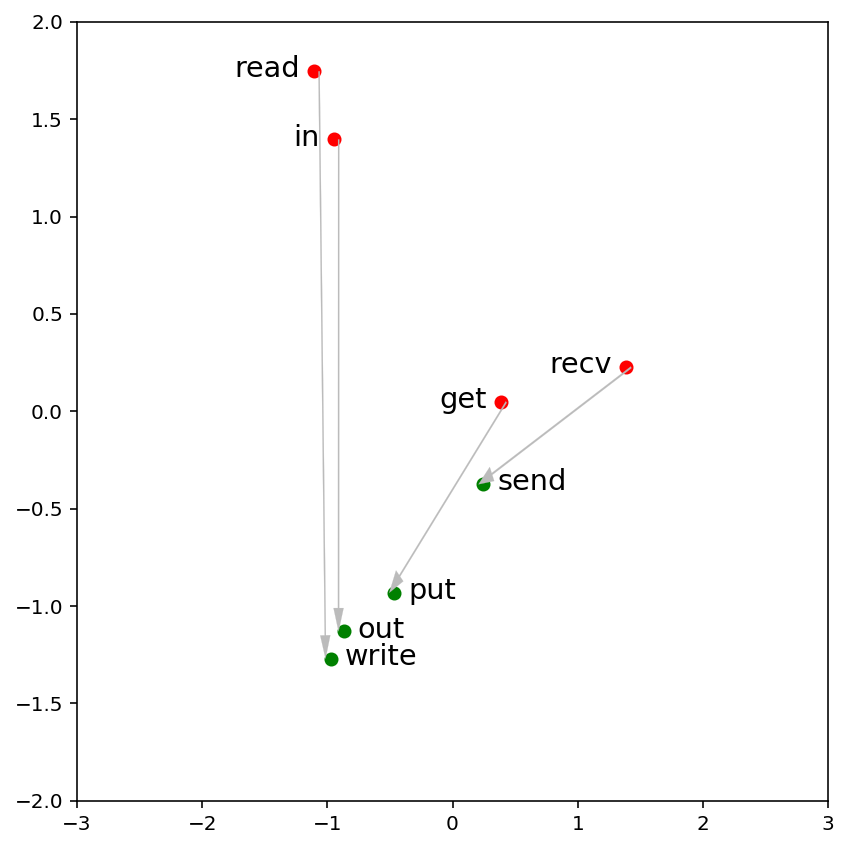

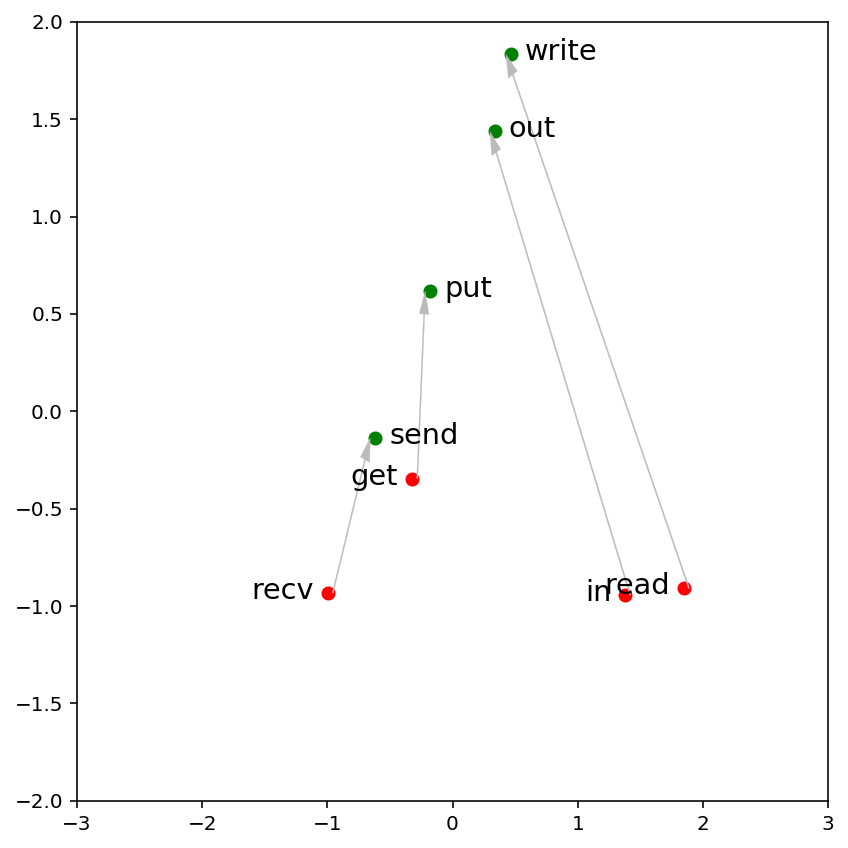

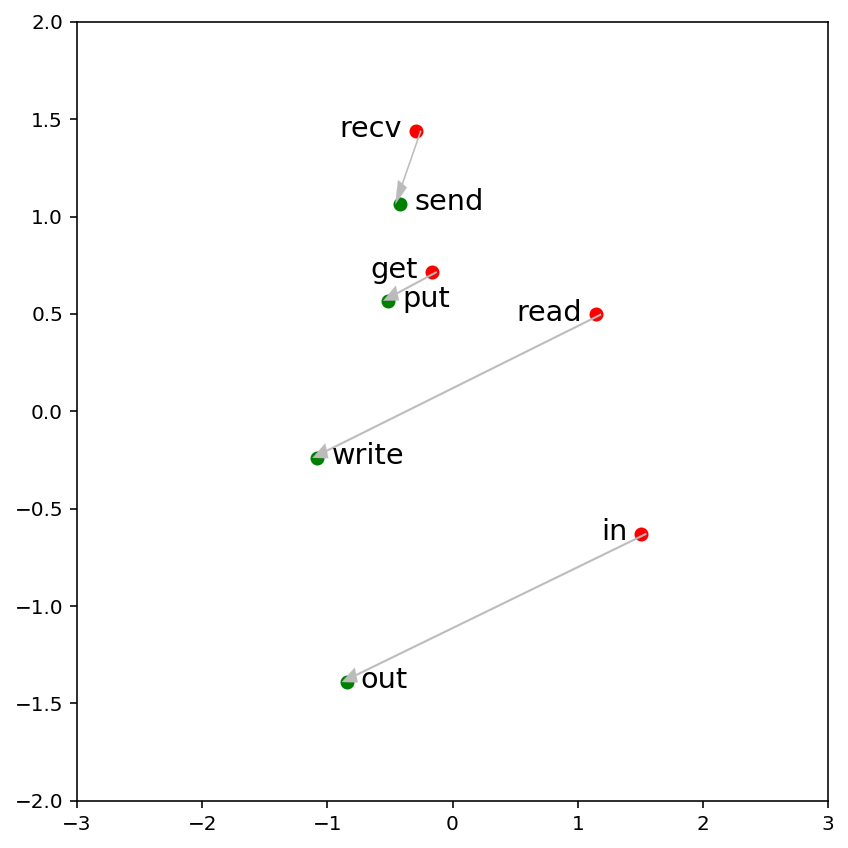

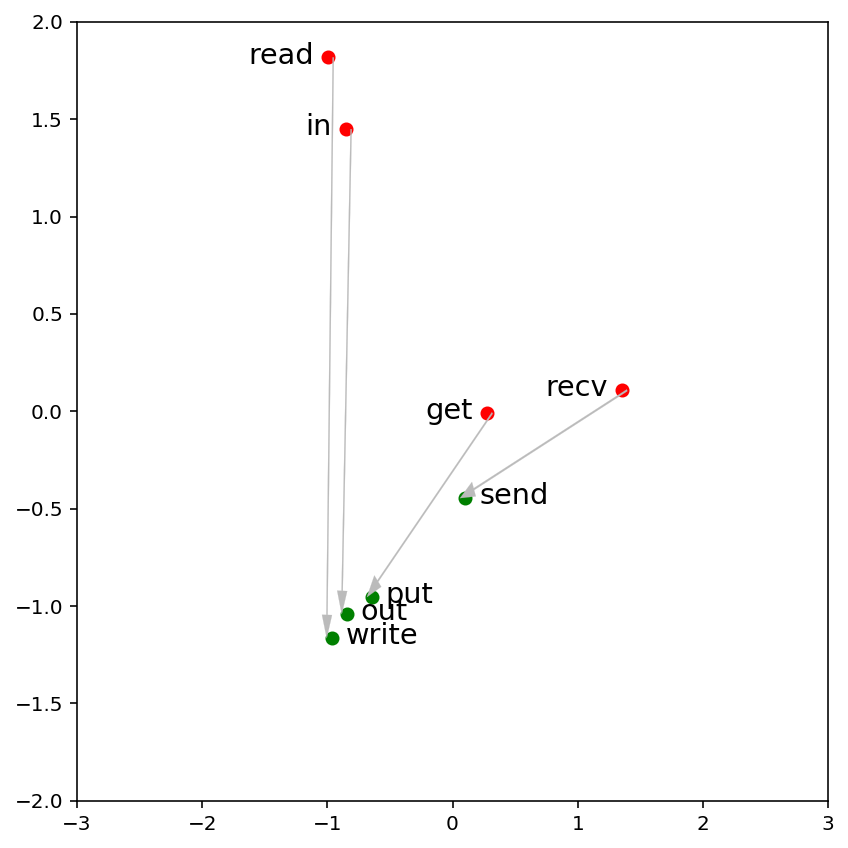

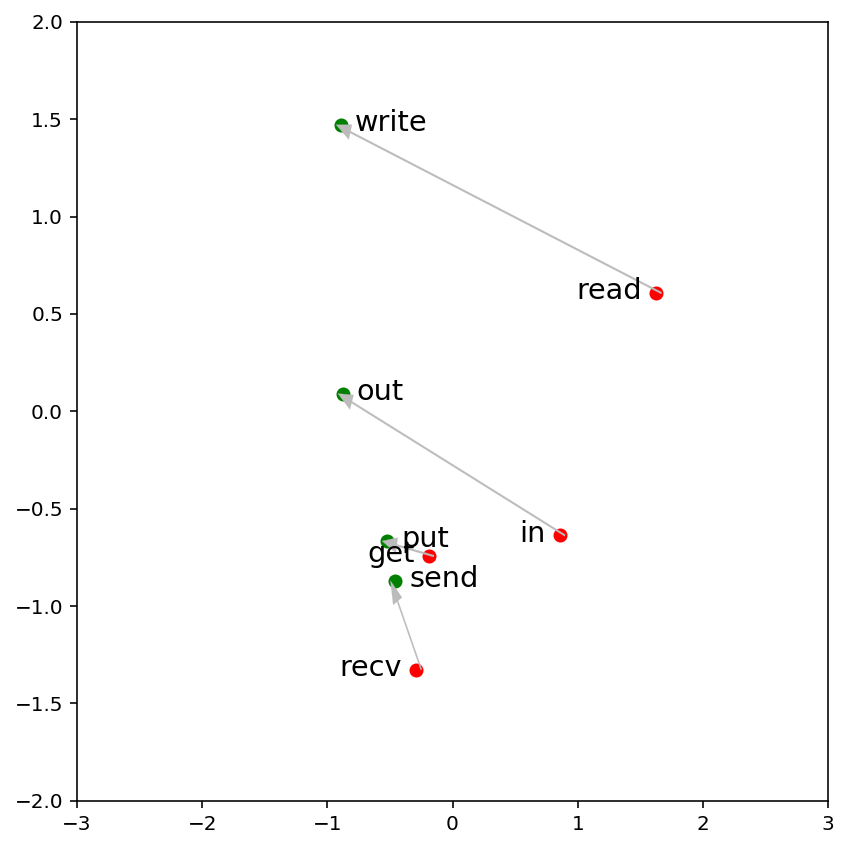

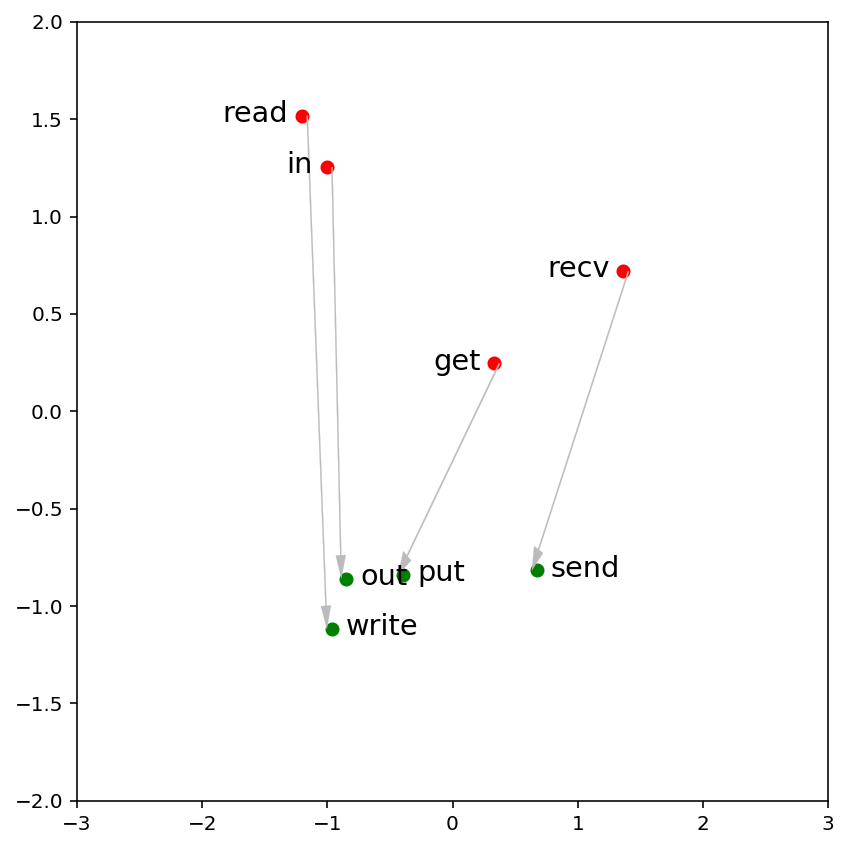

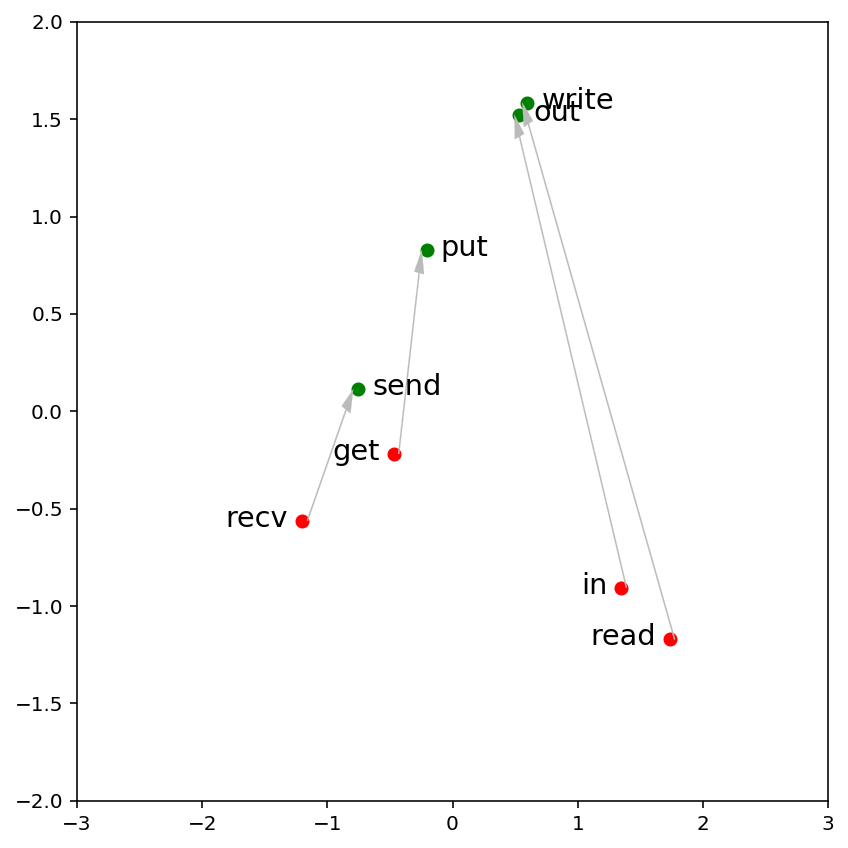

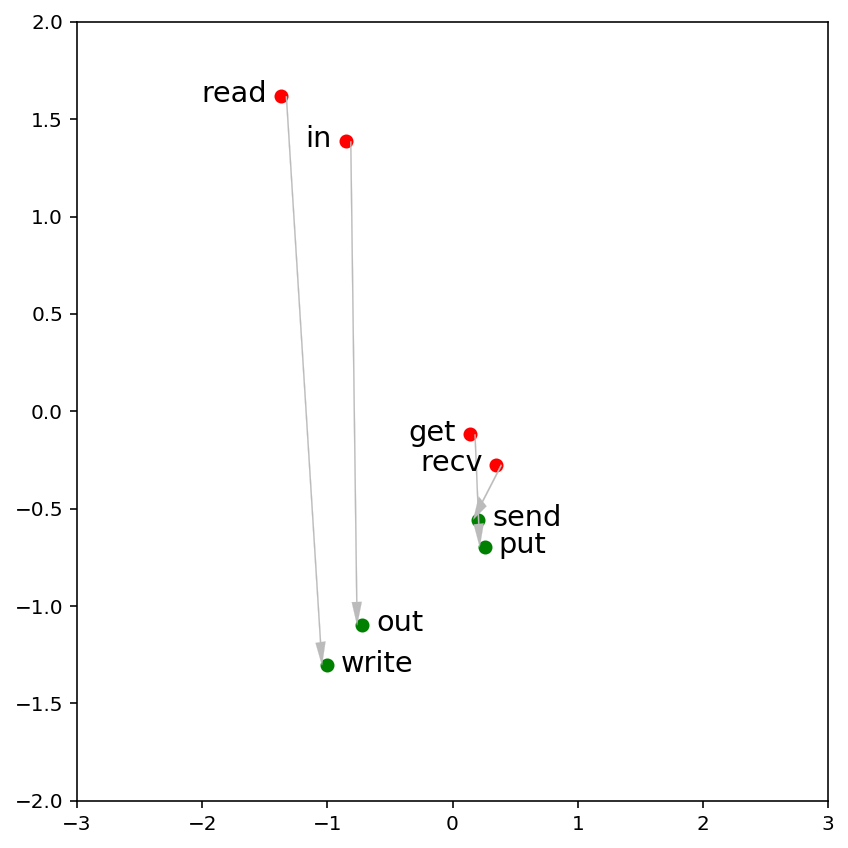

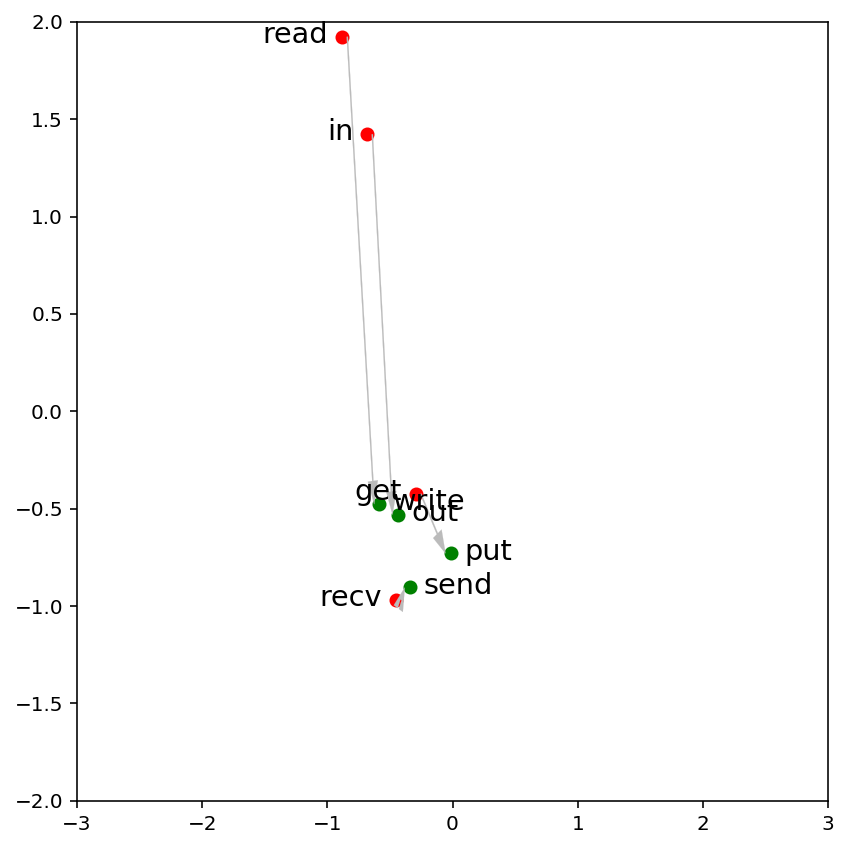

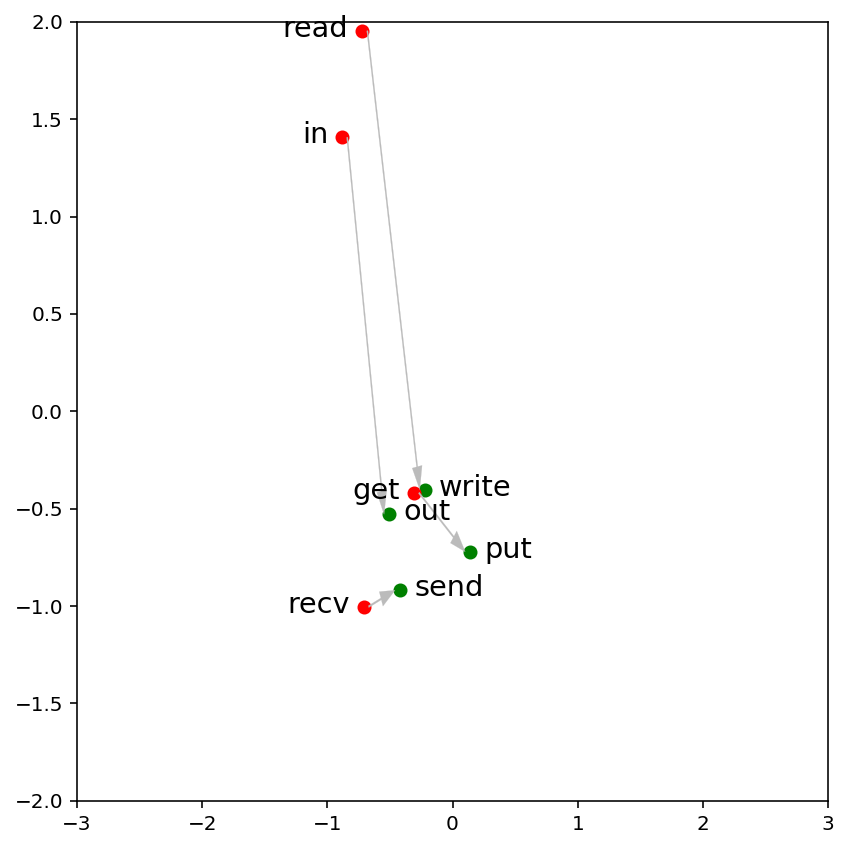

In [5]:
pairs = [('alloc', 'free'), ('open', 'close'),
         ('in', 'out'), ('stdin', 'stdout'), ('read', 'write'), ('recv', 'send'), ('load', 'save'),
         ('i', 'j'), ('a', 'b'), ('x', 'y')]

fixed_words = ['in', 'out', 'read', 'write', 'recv', 'send', 'get', 'put']

for combo in combinations(pairs, 1):
    words = fixed_words + list(reduce(operator.add, combo))
    draw_words(model, words, draw_words=fixed_words, pca=True, alternate=True, arrows=True, x1=-3, x2=3, y1=-2, y2=2)